## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import warnings 

warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
file_path = 'synthetic_sales_data.csv'  # Update with your file path
data = pd.read_csv(file_path)

## Dropping the 'date' column as it's not needed

In [4]:
data = data.drop(columns=['date'])

## Splitting the data into features and target variable

In [5]:
X = data.drop(columns=['sales'])
y = data['sales']

## Standardizing the numerical features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Splitting the data into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Initializing the models

In [8]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

## Function to calculate custom accuracy

In [9]:
def calculate_accuracy(y_true, y_pred, threshold=0.1):
    diff = np.abs(y_true - y_pred)
    accuracy = np.mean(diff / y_true <= threshold)
    return accuracy

## Training the models and storing their performance

In [10]:
performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = calculate_accuracy(y_test, y_pred)
    performance[model_name] = accuracy

## Convert performance to a DataFrame

In [12]:
performance_df = pd.DataFrame(performance, index=['Accuracy'])
print(performance_df)


          Linear Regression  Random Forest Regression  \
Accuracy            0.25989                  0.792745   

          Gradient Boosting Regression  
Accuracy                      0.811294  


## Set up the plotting grid

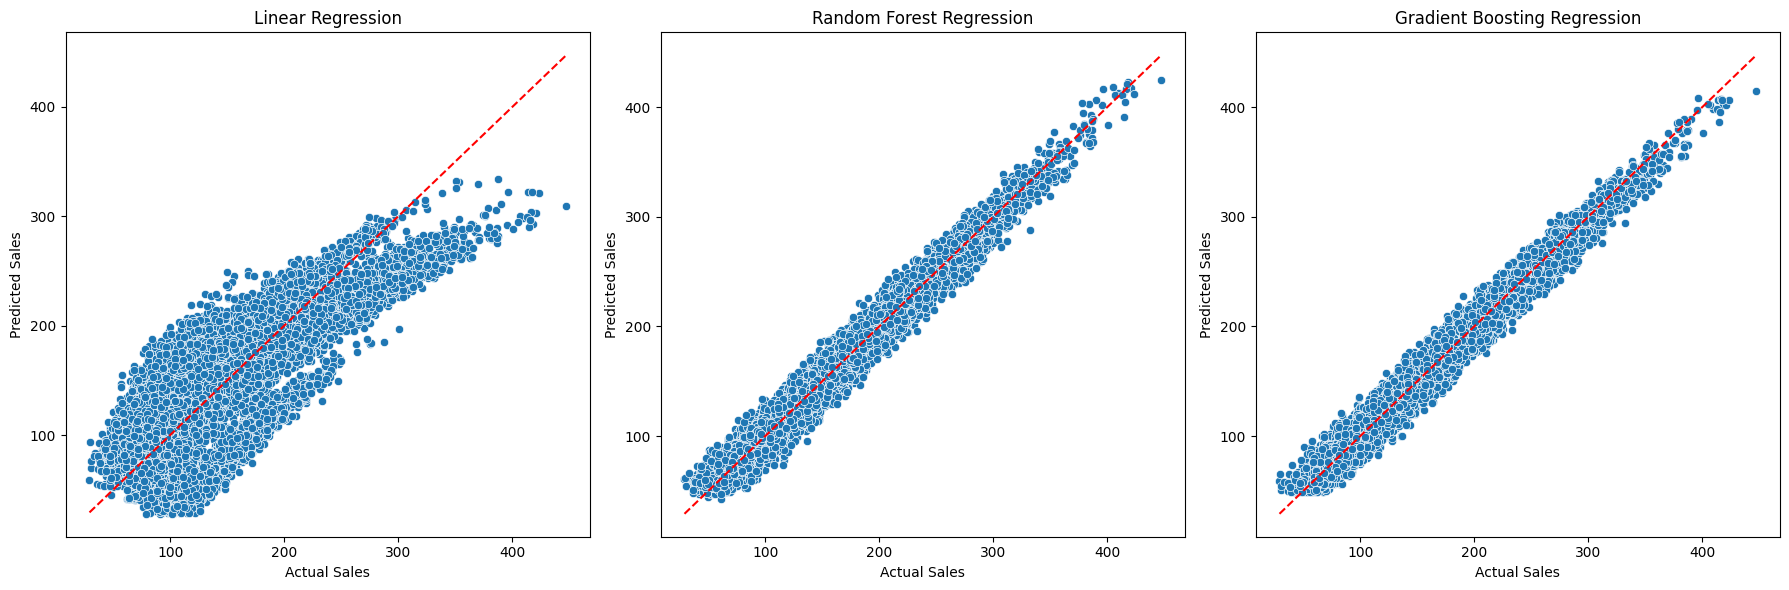

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (model_name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    sns.scatterplot(x=y_test, y=y_pred, ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Actual Sales')
    ax.set_ylabel('Predicted Sales')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()

### From the above models gradient boosting performes best so preceeding with that model

## Initialize and train the Gradient Boosting model

In [16]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

## Function to make a prediction

In [18]:
def make_prediction():
    # Prompt user to input values for each feature
    store_id = int(input("Enter store_id (e.g., 1): "))
    product_id = int(input("Enter product_id (e.g., 3): "))
    price = float(input("Enter price (e.g., 70.0): "))
    promotion = int(input("Enter promotion (1 for yes, 0 for no): "))
    holiday = int(input("Enter holiday (1 for yes, 0 for no): "))
    weekday = int(input("Enter weekday (1 for Monday, 7 for Sunday): "))
    month = int(input("Enter month (1-12): "))
    year = int(input("Enter year (e.g., 2020): "))

    # Create input data array
    input_data = [store_id, product_id, price, promotion, holiday, weekday, month, year]
    input_scaled = scaler.transform([input_data])  # Scaling the input

    # Predicting the sales
    prediction = model.predict(input_scaled)
    print(f"Predicted Sales: {prediction[0] :.2f}")

# Call the function to make a prediction
make_prediction()


Enter store_id (e.g., 1):  5
Enter product_id (e.g., 3):  3
Enter price (e.g., 70.0):  64.7
Enter promotion (1 for yes, 0 for no):  1
Enter holiday (1 for yes, 0 for no):  1
Enter weekday (1 for Monday, 7 for Sunday):  4
Enter month (1-12):  11
Enter year (e.g., 2020):  2020


Predicted Sales: 158.84
